## Preliminary data analysis

### TTL

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# reading data
TTI_data = pd.read_csv('data/train_TTI.csv')
TTI_data['time'] = pd.to_datetime(TTI_data['time'])  # transform time format
TTI_data['id_road'] = TTI_data['id_road'].astype('str')

In [28]:
TTI_data.head()

,id_road,TTI,speed,time
0,276183,1.03472,69.6197,2019-01-01 00:00:00
1,276183,1.03506,69.6275,2019-01-01 00:10:00
2,276183,1.04166,69.1003,2019-01-01 00:20:00
3,276183,1.02642,70.1266,2019-01-01 00:30:00
4,276183,1.01442,70.9565,2019-01-01 00:40:00


In [29]:
print(TTI_data['time'].min(),TTI_data['time'].max())

2019-01-01 00:00:00 2019-12-21 23:50:00


In [30]:
TTI_data.shape

(296198, 4)

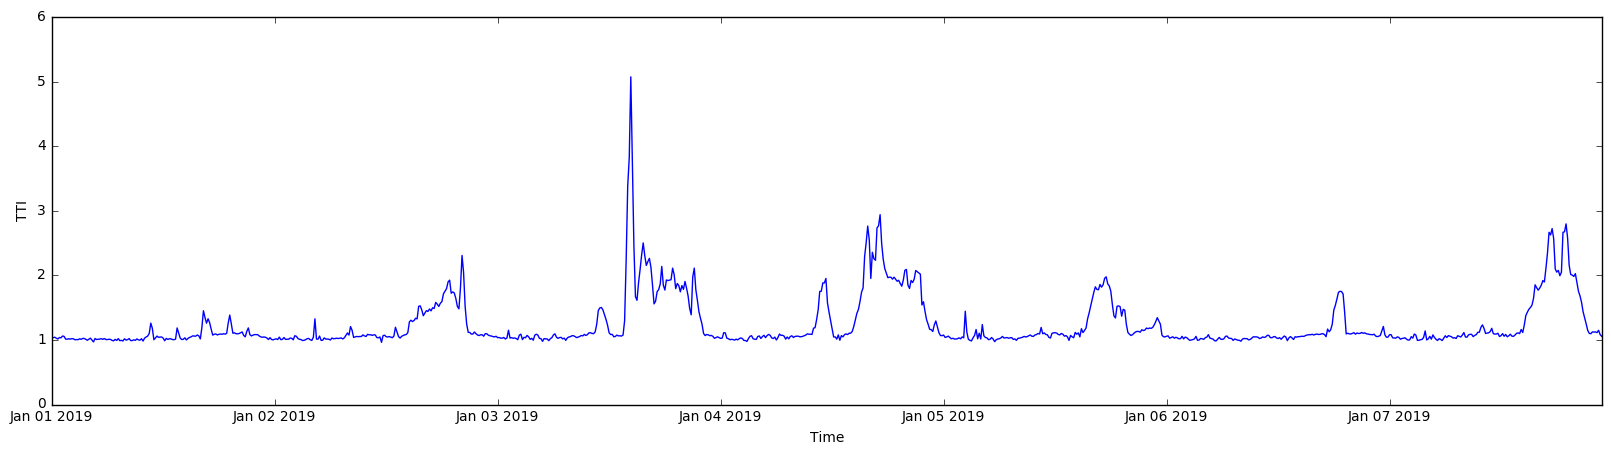

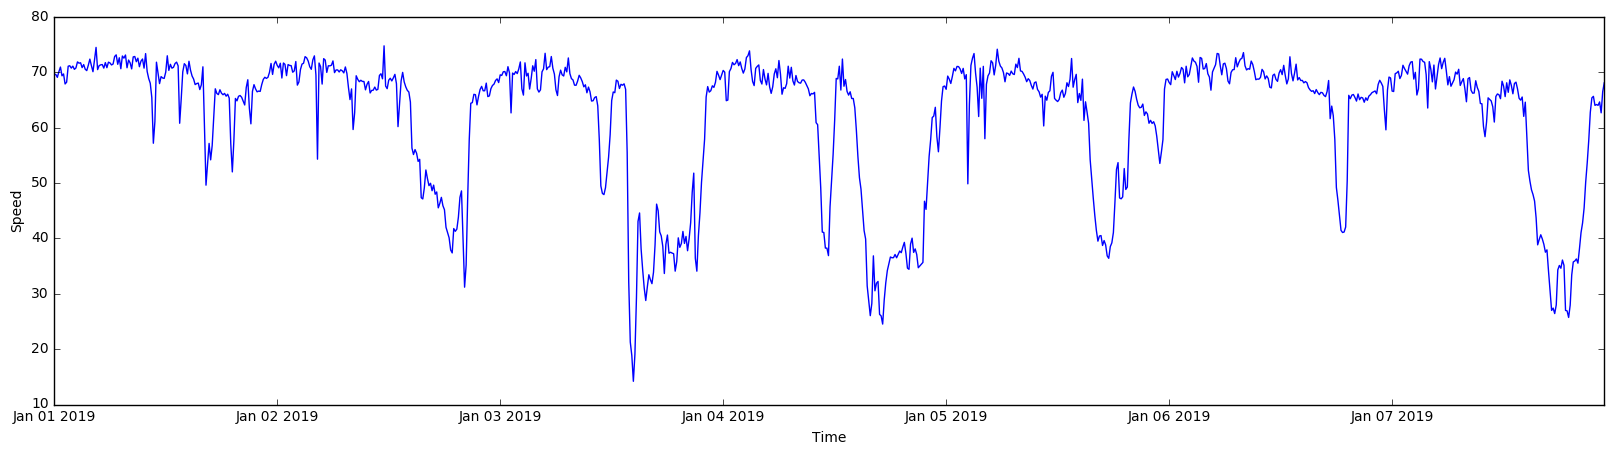

In [31]:
# simply observe data
plotdata = TTI_data[TTI_data['id_road'] == '276183'].head(1000)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20,5))
plt.plot(plotdata['time'],plotdata['TTI'])
plt.xlabel('Time')
plt.ylabel('TTI')
plt.figure(figsize=(20,5))
plt.plot(plotdata['time'],plotdata['speed'])
plt.xlabel('Time')
plt.ylabel('Speed')
plt.show()

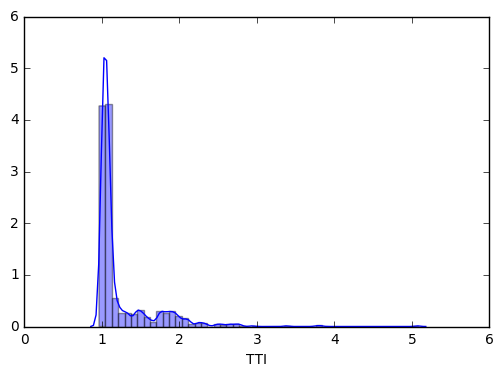

In [32]:
sns.distplot(plotdata['TTI'])
plt.show()

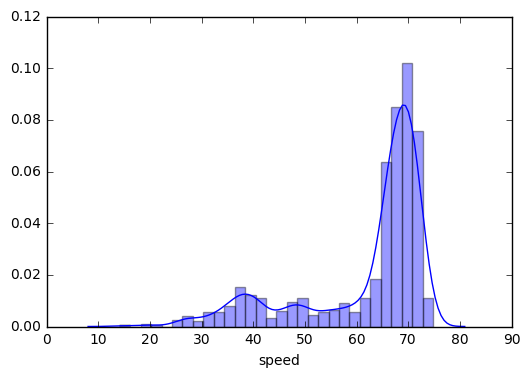

In [33]:
sns.distplot(plotdata['speed'])
plt.show()

## GPS of Online car 

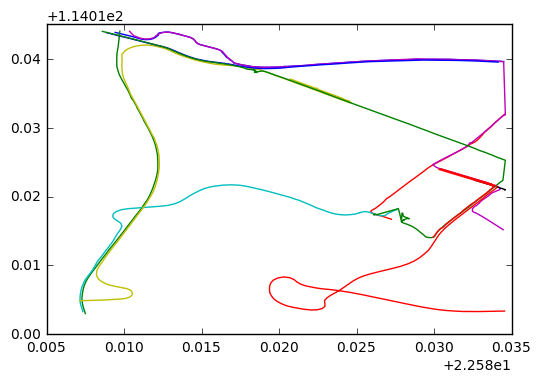

In [34]:
chunksize = 1000
gps_data = pd.read_csv('train_20191201_20191220/20191201_20191220.csv',chunksize = chunksize,
                       names=['id_customer','id_order','gps'])
test_data = gps_data.get_chunk(chunksize)

for i in range(10):
    gps_path = test_data['gps'][i]
    t_list = gps_path.strip('[]').replace(',','').split(' ')
    t_list = np.array([float(t) for t in t_list])
    pathdata = pd.DataFrame(t_list.reshape(-1,5),columns =['lon','lat','speed','theta','time'],)
    plt.plot(pathdata['lat'],pathdata['lon'])

plt.show()

In [35]:
pathdata.head()

,lon,lat,speed,theta,time
0,114.02408,22.60995,0.89,14.486000,1.576503e+09
1,114.02408,22.60995,1.34,14.486000,1.576503e+09
2,114.02416,22.60997,3.63,70.566299,1.576503e+09
3,114.02416,22.60997,3.63,70.566299,1.576503e+09
4,114.02429,22.61002,5.77,70.894096,1.576503e+09


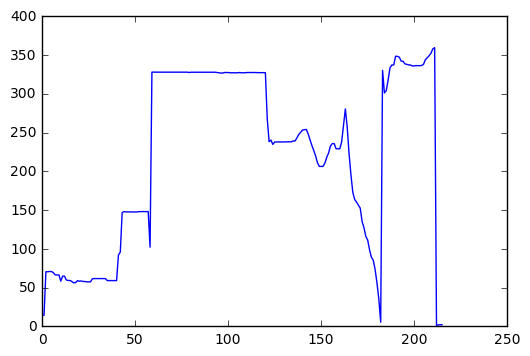

In [36]:
plt.plot(pathdata['theta'])
plt.show()

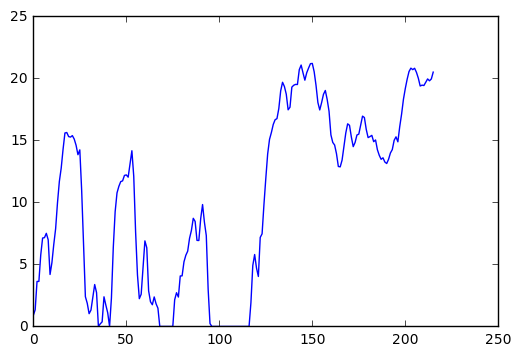

In [21]:
plt.plot(pathdata['speed'])
plt.show()

In [ ]:
import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoidG9uZ3hpbnJlbiIsImEiOiJjazZnM2phcXEwdTJ5M2pxcHQ3MDRteHNlIn0.ci2XKyZQRC_tAEcvxVIeAQ')
fig = px.scatter_mapbox(pathdata, lat="lat", lon="lon",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [ ]:
from folium import plugins
import folium
import os

m = folium.Map(location=[22.45,113.80],zoom_start=7,)

location=[]
for name,row in pathdata.iterrows():
    location.append([row['lat'],row['lon']])
    
# The polyline method connects coordinates in the form of line segments
route = folium.PolyLine(locations=location, 
 weight=3, 
 color='orange', 
 opacity=0.8 
).add_to(m) 
m

In [115]:
import gmplot

lats=[]
lons=[]
for name,row in pathdata.iterrows():
    lats.append(row['lat'])
    lons.append(row['lon'])
    
gmap = gmplot.GoogleMapPlotter(22.45,113.80,7)
gmap.plot(lats,lons,color='r', size=400)
gmap.draw('mymap.html')